<a href="https://colab.research.google.com/github/faranak-jahedi/ML-Projects/blob/main/ML_Lab_Excersice_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab : Dimensionality reduction using PCA and K-Means

We will use a wine dataset that is packaged into the scikit learn :
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [ ]:
import csv
import urllib

import pandas as pd

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
%matplotlib inline


### Load the wine dataset into a Dataframe, create X, y variable

In [ ]:
wines = load_wine()
wine_df = pd.DataFrame(wines.data, columns=wines.feature_names)
X = wines.data
y = wines.target
wine_df.shape

(178, 13)

In [ ]:
X = wines.data
y = wines.target

In [ ]:
print(X.shape, y.min(),y.max())

(178, 13) 0 2


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

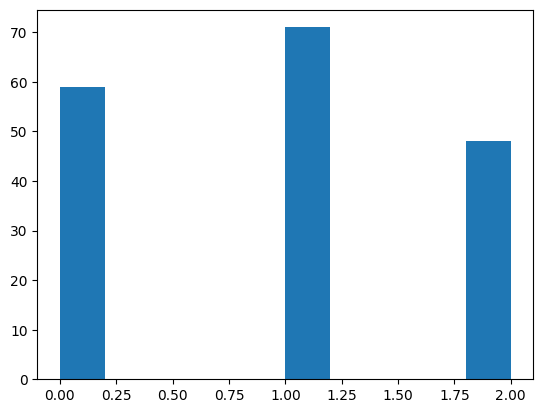

In [ ]:
plt.hist(y)

### PCA

**Machine Learning task**:  Find a more compact representation of the key features of wine

#### Exercise :

1) Normalize the X data by subtracting mean and dividing by standard deviation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

2) Create a PCA model and apply it to the scaled X data. Assign the result to a variable named Z (I will use this variable in a plot below) Pg 222 in the book is relevant (but do not restrict it to just 2 Principal components)

**Normalizing the X data by using StandardScalar**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

# Create a PCA model
pca = PCA(n_components=None) #  retain all principal components

# Fit the PCA model to the scaled data and transform the data
Z = pca.fit_transform(X_normalized)

# Z contains the data transformed by PCA, which includes all the principal components


#### Exercise

1) Display the contents of the explained_variance_ratio_ variable    What does this information tell you ?

2) plot the explained_variance_ratio_    plt.plot(...)

The explained_variance_ratio_ variable in a PCA (Principal Component Analysis) model contains the proportion of the total variance in the original data explained by each of the principal components. This tells how much of the total variance in the data is captured by each principal component. This metric is to understand the importance or contribution of each component in reducing the dimensionality of the data.

In [ ]:
print(pca.explained_variance_ratio_)


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


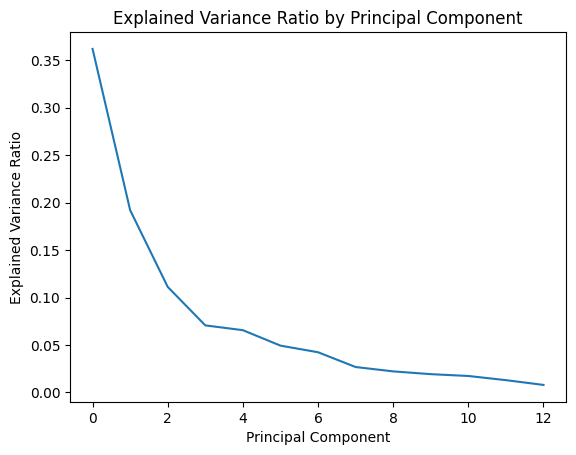

In [ ]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component') # label for X vector of the plot
plt.ylabel('Explained Variance Ratio') # label for y vector of the plot
plt.title('Explained Variance Ratio by Principal Component') # label the title of the plot
plt.show()

#### Exercise

Provide a clear and succient explanation for the plot given below. Note, this plot depends on the result of PCA being assign to a variable named Z  

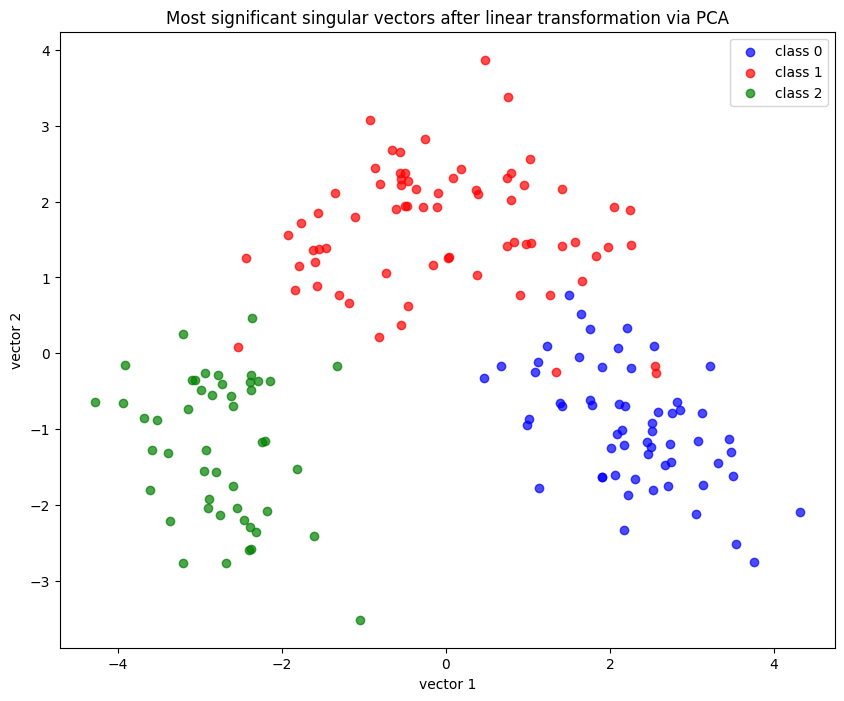

In [ ]:
plt.figure(figsize=(10,8))
colors = ('blue', 'red', 'green')

for i in range(0,3):
    plt.scatter(x=Z[:,0][y == i],y=Z[:,1][y == i],color=colors[i],alpha=0.7,label='class {}'.format(i))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

The plot is a scatterplot, which is a type of data visualization that shows individual data points as dots on a two-dimensional plane and displays a  visualizes the most significant singular vectors after a linear transformation using Principal Component Analysis (PCA). The data points are based on their class labels, where each color represents a different class or category. There are three classes represented by the colors blue, red, and green.

The data points have been projected onto a two-dimensional space represented by "vector 1" on the x-axis and "vector 2" on the y-axis. These vectors correspond to the first two principal components obtained through PCA.

The legend on the plot indicates the color corresponds to each class (class 0, class 1, and class 2).

The color-coding allows to see how different classes are distributed in this space, potentially revealing relationships or differences between the classes.

### K-Means

**Machine Learning task** Group together similar instances of data

#### Exercise : Figure out a good number of clusters

We need to try a number of different clusters and measure the tightness of the clusters using the inertia_ variable.

1) Initialize an empty array named inertia
2) for i in range(1,11):
    a) create a K-Means object with i clusters
    b) fit the K-Means object to the scaled X data
    c) append the inertia_ associated with the k-means fit to inertia array

Plot inertia vs number of clusters. This is known as the elbow method. How many clusters should we select ?

In [ ]:
from sklearn.cluster import KMeans

# Initialize an empty array named 'inertia'
inertia = []

# Loop through numbers of clusters (from 1 to 10)
for i in range(1, 11):
    # Create a K-Means object with 'i' clusters
    kmeans = KMeans(n_clusters=i, random_state=42)

    # Fit the K-Means object to the scaled X data
    kmeans.fit(X_normalized)

    # Append the inertia_ (within-cluster sum of squares) to the 'inertia' array
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

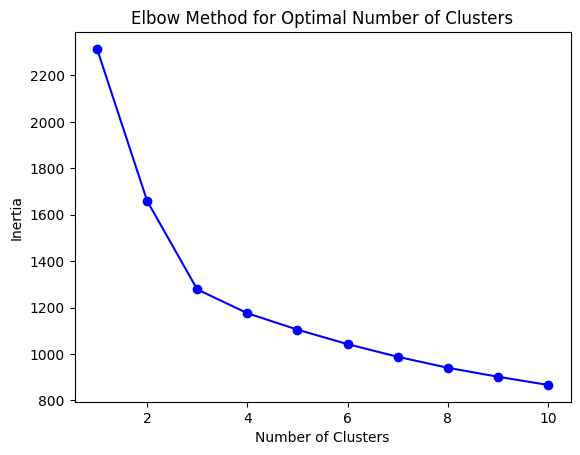

In [ ]:
import matplotlib.pyplot as plt

# Plot inertia vs number of clusters (elbow method)
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


This plot shows the relationship between the number of clusters and the inertia. The optimal number of clusters (here is 3) determined by looking for the "elbow" point in the plot. This is the point where the inertia starts to level off, and increasing the number of clusters doesn't significantly reduce the within-cluster sum of squares.

#### Exercise :  Calculate K-Means for the chosen number of clusters

Call the method fit_predict on the scaled data and assign the result to a variable named y_pred. y_pred will have the cluster assignments.

In [ ]:
from sklearn.cluster import KMeans

# Create a K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Use fit_predict to assign cluster labels to the data
y_pred = kmeans.fit_predict(X_normalized)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Exercise :  Plot the results

Unlike the book, we have many different columns of data, initially, it may not be clear how to plot these clusters in such a large multi-dimensional space.

But, then, we remember that we have an alternative lower dimensional representation of our data using Principal components. Create a copy and alter the above scatterplot to display colors based on y_pred rather than the y variable from the scikit learn model.

Why are the colors different ?

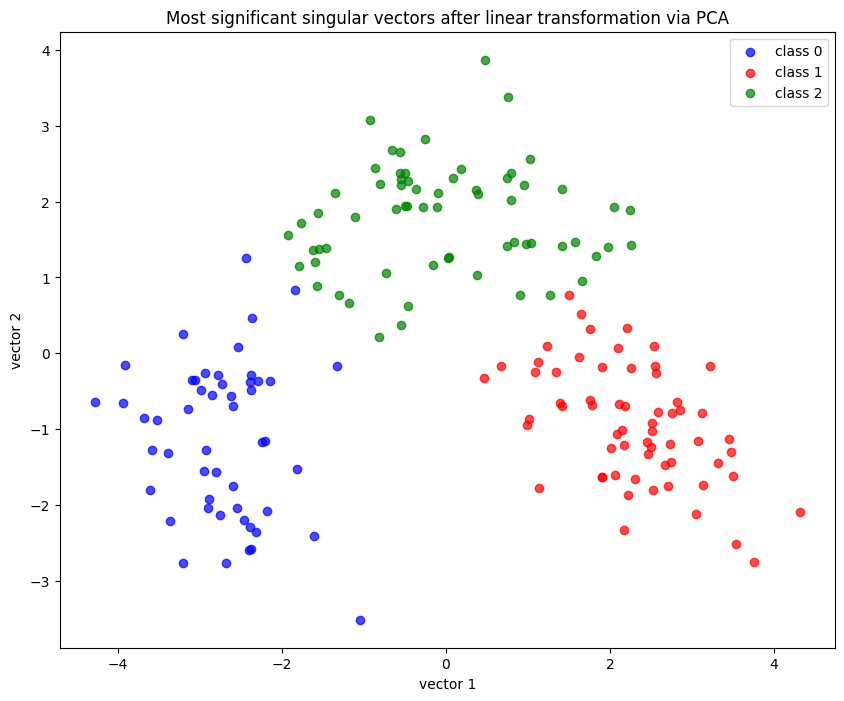

In [ ]:
plt.figure(figsize=(10,8))
colors = ('blue', 'red', 'green')

for i in range(0,3):
    plt.scatter(x=Z[:,0][y_pred == i],y=Z[:,1][y_pred== i],color=colors[i],alpha=0.7,label='class {}'.format(i))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

The colors in this scatterplot are different from what I had seen using the original y variable because now it is **visualizing the data based on cluster assignments generated by K-Means clustering, rather than the true class labels** from the wine dataset. The K-Means algorithm groups data points into clusters **based on their similarity**, and the color assignment is **based on these clusters**. This is different from the original class labels.

### Extra Credit/Graduate students

The “Wine” Dataset that is deposited on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality). It has 11 variables and 1600 observations.Do a similar PCA and K-Means analysis on the data. Note that it has a different number of quality levels. In addition to providing the notebook, provide your thoughts on the differences in the two datasets.


In [ ]:
!pip install pandas


In [ ]:
import pandas as pd
import urllib.request

# URL of the dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Define a local filename for the downloaded dataset
local_filename = "winequality-white.csv"

# Download the dataset
urllib.request.urlretrieve(dataset_url, local_filename)


('winequality-white.csv', <http.client.HTTPMessage at 0x7af3f3db7040>)

In [ ]:
# Load the dataset into a DataFrame
wine_data = pd.read_csv("winequality-white.csv", delimiter=';')


# Handling missing values

In [ ]:
# Check for missing values
missing_values = wine_data.isnull().sum()

# If there are missing values, fill them with a specific value or drop rows with missing values
wine_data.fillna(wine_data.mean(), inplace=True)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Check if there are feature columns and they are not empty
if wine_data.shape[1] > 1:
    # Extract the feature columns (excluding the target variable) as a NumPy array
    X = wine_data.iloc[:, :-1].values

    # Apply scaling to the feature columns
    X_scaled = scaler.fit_transform(X)

    # Replace the original feature columns with the scaled values
    wine_data.iloc[:, :-1] = X_scaled
else:
    print("No feature columns found in the dataset.")


 PCA (Principal Component Analysis) and K-Means analysis on the "Wine Quality" dataset, whith different number of quality levels

In [ ]:
from sklearn.decomposition import PCA

# Extract feature columns
X = wine_data.iloc[:, :-1]

# Initialize PCA with the number of components
pca = PCA(n_components=2)

# Fit and transform the data
Z = pca.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

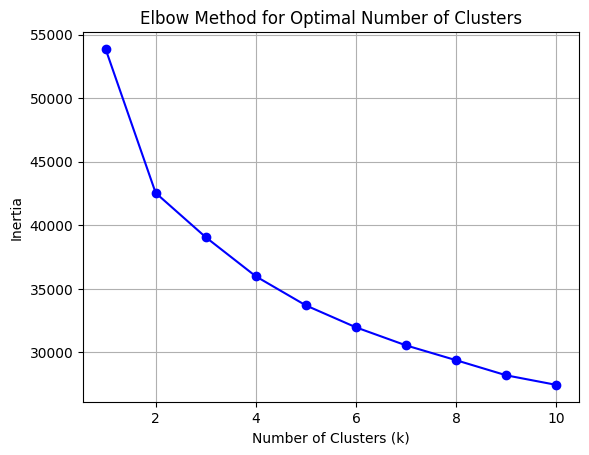

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create an empty array to store inertia values
inertia = []

# Define a range of cluster counts (k values)
k_values = range(1, 11)

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)  # X is your data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Initialize K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=2)

# Fit K-Means to the PCA-transformed data
y_pred = kmeans.fit_predict(Z)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualize Results**

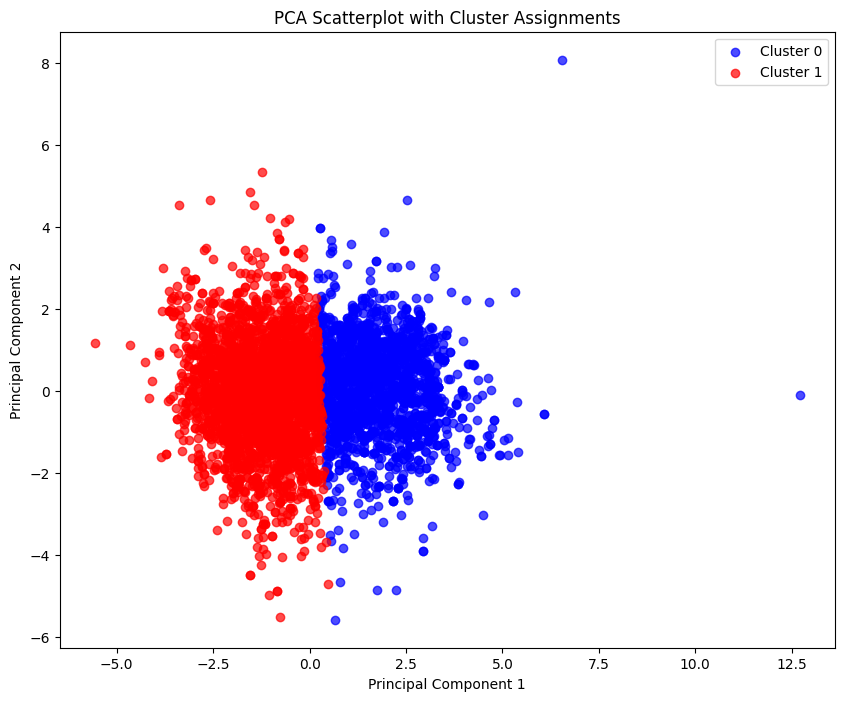

In [ ]:
import matplotlib.pyplot as plt

# Define colors for different clusters
colors = ['blue', 'red']

# Create a scatterplot to visualize clustering results
plt.figure(figsize=(10, 8))

for i in range(0, 2):
    plt.scatter(x=Z[:, 0][y_pred == i], y=Z[:, 1][y_pred == i], color=colors[i], alpha=0.7, label='Cluster {}'.format(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Scatterplot with Cluster Assignments')
plt.show()


The original "Wine" dataset may have been designed for various purposes, such as classification or regression tasks. It could have included attributes related to various aspects of wine, but without specific information about wine quality levels. In contrast, the "Wine Quality" dataset is primarily focused on wine quality. It includes attributes related to wine characteristics, such as acidity, pH, alcohol content,etc.

The specific characteristics of the original "Wine" dataset, including the number of variables and observations, were not provided in the original questions.The "Wine Quality" dataset consists of 11 variables and 1600 observations and focuses on white wine quality ratings, and each observation corresponds to a particular white wine sample.

The variable types (e.g., continuous, categorical) in the original "Wine" dataset depend on the dataset's design and purpose. The "Wine Quality" dataset contains both continuous and categorical attributes. Some of the variables are continuous (e.g., acidity levels, alcohol content), while others represent quality ratings as discrete values.